In [1]:
# First we will import all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Will read the file ....
titanic = pd.read_csv('titanic.csv')
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
# Overall Info for the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
# We will see the overall summary of all the columns
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Summary:
1. Roughly 40% of the customers survived
2. There were three passenger class and most of the customers went with 3rd passenger class.
3. Most of the passengers seems to be young. 75% of the customers are below 38.
4. Most of our customers paid less than 31 dollar but few customers even paid 512 dollars.

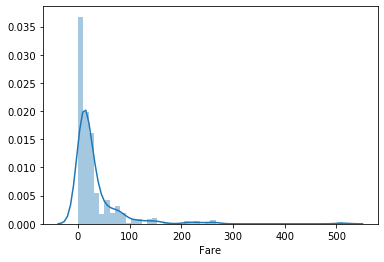

In [5]:
# We will see how the Fare distribution look like
sns.distplot(titanic.Fare)

Looks like majority of our Fare is between 0 and 50. But the max Fare is 512. 

In [6]:
# we will first divide the data into different deciles on the basis of the Fare and then we will see what is the survival 
# rate and average Fare into different deciles

titanic['decile']=pd.qcut(titanic['Fare'], 10,labels=False)
titanic['survival_rate'] = titanic.groupby('decile')['Survived'].transform('mean')
titanic['Avg_fare'] = titanic.groupby('decile')['Fare'].transform('mean')
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,decile,survival_rate,Avg_fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,0.141304,5.928717
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,8,0.528090,59.444572
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,2,0.182692,7.964974
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,8,0.528090,59.444572
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,2,0.182692,7.964974


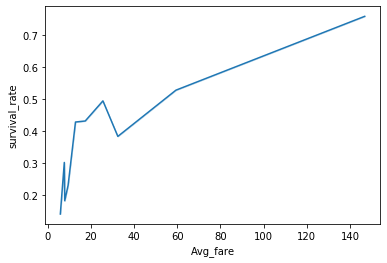

In [7]:
# We will make a lineplot of average Fare with survival rate
sns.lineplot('Avg_fare','survival_rate',data=titanic)

We see that survival rate improves with Fare on an average,which says that there is higher chance of survival if you paid higher fare. It might be just because the staff on the Titanic might be prefering higher end customers to save as compared to lower end customers.

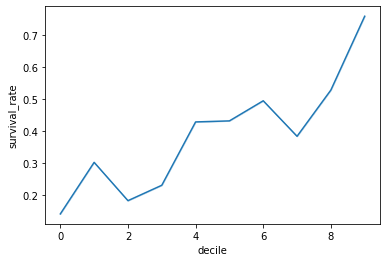

In [8]:
# We will make a lineplot of Fare Decile with survival rate
sns.lineplot('decile','survival_rate',data=titanic)

In [9]:
# We see that survival rate is trending upwards with the decile which says that there is higher chance of survival if you paid higher fare

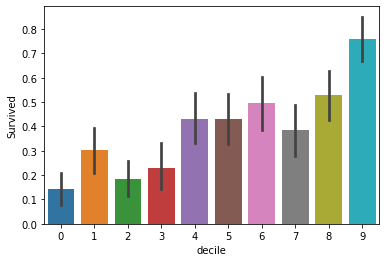

In [10]:
# We will plot survived with decile to see if the survival rate improves with the decile
sns.barplot(x='decile', y = 'Survived', data = titanic)

In [11]:
# We see that generally survival rate improves with decile(Fare) on an average. 
# When the fare is in 1st decile,the survival rate is less than 20%
# While when the fare is last decile, the survival rate is around 80%
# As the pattern is not linear, so there might be other factors which might be affecting survival rate...